In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:>

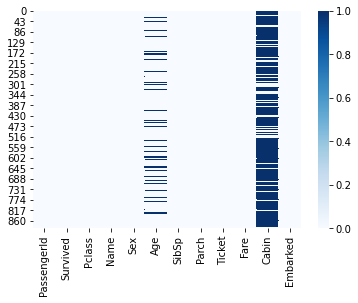

In [6]:
sns.heatmap(data.isnull(), cmap='Blues')

In [7]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

As i can confirm from the heatmap and info() that there are missing values in age and cabin column. I will drop ticket column, name colunm and Passesnger ID column

<AxesSubplot:xlabel='Survived', ylabel='count'>

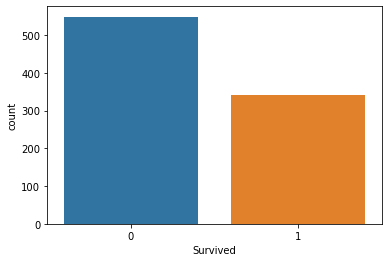

In [9]:
sns.countplot(data=data, x="Survived")

As i can see there is a imbalance in the data. Hence I tried using SMOTE and performed the classification but when i compared the scores with models where data was not imputed with SMOTE, i found that the result are better without balancing the data. So, i am not using SMOTE in this project.

In [10]:
print(data['Cabin'].value_counts())

B96 B98        4
C23 C25 C27    4
G6             4
D              3
F2             3
              ..
C118           1
A24            1
C90            1
B102           1
B78            1
Name: Cabin, Length: 147, dtype: int64


There are 204 elements in the Cabin colunm and which is only 23% of data missing from the column. I can not take risk for filling this much of data from my end. Hence I first i would like to concern with client, else i will delete it. 

In [11]:
data.drop(['PassengerId','Name','Ticket','Cabin'], axis=1,inplace=True)
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [12]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['Sex']=label_encoder.fit_transform(data['Sex'])
data['Embarked']=label_encoder.fit_transform(data['Embarked'])
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2
887,1,1,0,19.0,0,0,30.0000,2
888,0,3,0,NaN,1,2,23.4500,2
889,1,1,1,26.0,0,0,30.0000,0


In [13]:
data["Age"]=data["Age"].fillna(data["Age"].mean())

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


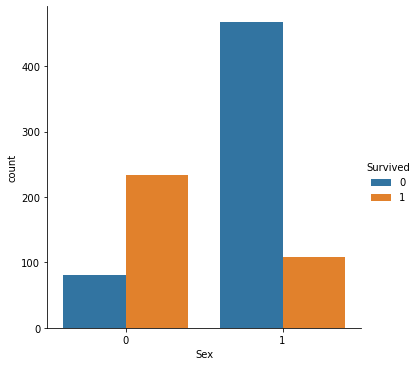

In [15]:
sns.catplot(x ="Sex", hue ="Survived", kind ="count", data = data)

As plot says, the chances of survival of females are higher compared to males.

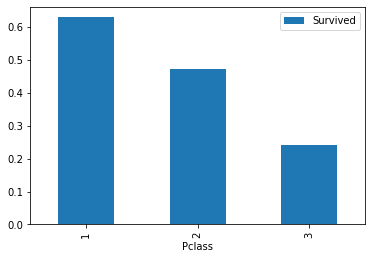

In [16]:
pivot = data.pivot_table(index="Pclass",values="Survived")
pivot.plot.bar()
plt.show()

Class 1 passengers has the highest number of survived passengers meaning people who have paid more for the tickets also bought the higher chances of survival in the bad situations. Lower class passengers were considered to be the last ones to be saved.

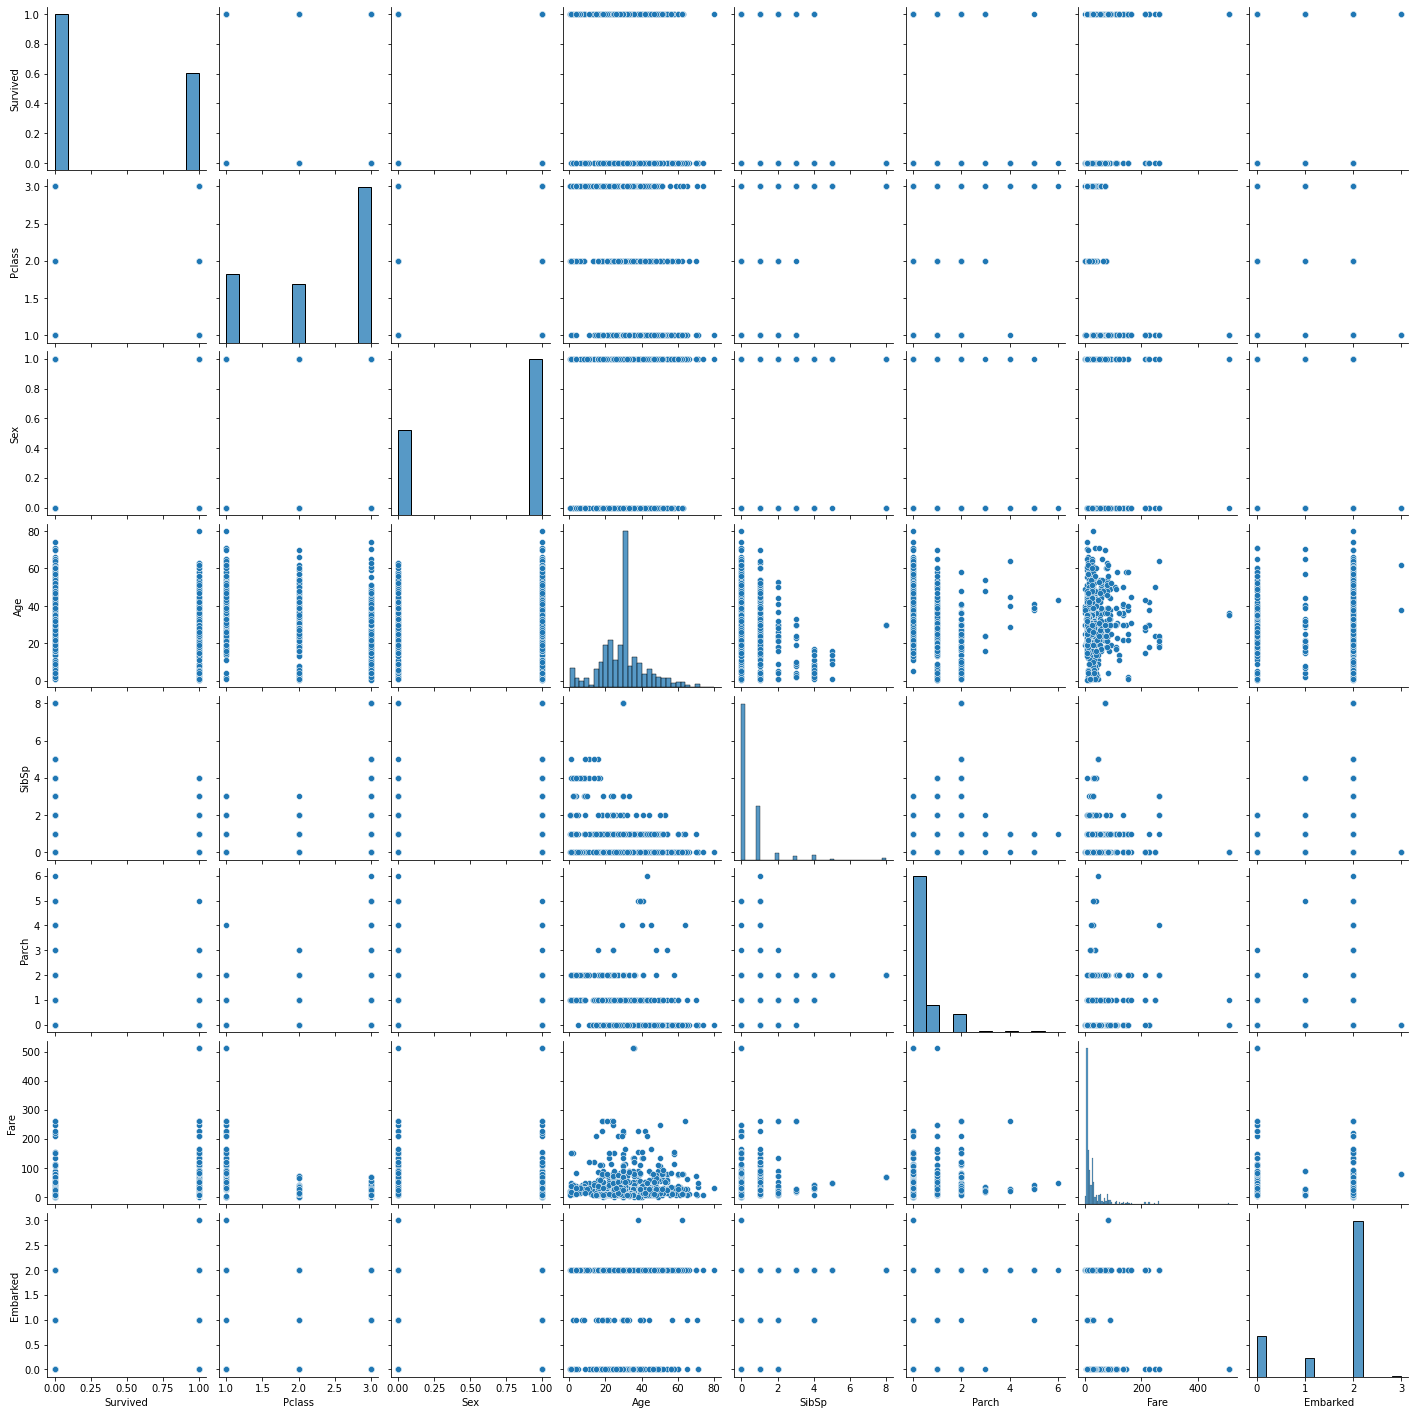

In [17]:
sns.pairplot(data=data)

In [18]:
cor = data.corr()
cor

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.338481,-0.543351,-0.069809,-0.035322,0.081629,0.257307,-0.163517
Pclass,-0.338481,1.000000,0.131900,-0.331339,0.083081,0.018443,-0.549500,0.157112
Sex,-0.543351,0.131900,1.000000,0.084153,-0.114631,-0.245489,-0.182333,0.104057
Age,-0.069809,-0.331339,0.084153,1.000000,-0.232625,-0.179191,0.091566,-0.022239
SibSp,-0.035322,0.083081,-0.114631,-0.232625,1.000000,0.414838,0.159651,0.066654
Parch,0.081629,0.018443,-0.245489,-0.179191,0.414838,1.000000,0.216225,0.038322
Fare,0.257307,-0.549500,-0.182333,0.091566,0.159651,0.216225,1.000000,-0.221226
Embarked,-0.163517,0.157112,0.104057,-0.022239,0.066654,0.038322,-0.221226,1.000000


<AxesSubplot:>

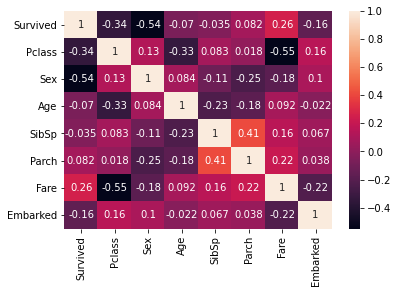

In [19]:
sns.heatmap(data=cor, annot=True)

From pairplot and correlation heatmap, I do not find any problem of multicolinearity in the data. The problem is that there is no variable which i can say is a good predictor as none variable has good correlation with target as well.

In [20]:
x = data.drop(['Survived'], axis=1)
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2


In [21]:
y = data.iloc[:,:1]
y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [22]:
maxscore=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=i)
    mod = LogisticRegression()
    mod.fit(x_train,y_train)
    pred = mod.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc>maxscore:
        maxscore=acc
        maxRS=i
print("Best accuracy score is ", maxscore, 'on Random state ', maxRS)

Best accuracy score is  0.8507462686567164 on Random state  76


In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=76)

In [24]:
x_train.shape

(623, 7)

In [25]:
y_train.shape

(623, 1)

In [26]:
x_test.shape

(268, 7)

In [27]:
y_test.shape

(268, 1)

In [28]:
model=[DecisionTreeClassifier(),SVC(),KNeighborsClassifier(),GaussianNB(),LogisticRegression(),RandomForestClassifier()]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    m_pred=m.predict(x_test)
    print('accuracy_score of',m,"is:")
    print(accuracy_score(y_test,m_pred))
    print(confusion_matrix(y_test,m_pred))
    print(classification_report(y_test,m_pred))
    print("\n")

accuracy_score of DecisionTreeClassifier() is:
0.7835820895522388
[[135  30]
 [ 28  75]]
              precision    recall  f1-score   support

           0       0.83      0.82      0.82       165
           1       0.71      0.73      0.72       103

    accuracy                           0.78       268
   macro avg       0.77      0.77      0.77       268
weighted avg       0.78      0.78      0.78       268



accuracy_score of SVC() is:
0.6716417910447762
[[150  15]
 [ 73  30]]
              precision    recall  f1-score   support

           0       0.67      0.91      0.77       165
           1       0.67      0.29      0.41       103

    accuracy                           0.67       268
   macro avg       0.67      0.60      0.59       268
weighted avg       0.67      0.67      0.63       268



accuracy_score of KNeighborsClassifier() is:
0.7014925373134329
[[135  30]
 [ 50  53]]
              precision    recall  f1-score   support

           0       0.73      0.82      0.

In [29]:
print(cross_val_score(DecisionTreeClassifier(),x,y,cv=10).mean())

0.7722222222222224


In [30]:
print(cross_val_score(SVC(),x,y,cv=10).mean())

0.6801997503121099


In [31]:
print(cross_val_score(KNeighborsClassifier(),x,y,cv=10).mean())

0.7048813982521848


In [32]:
print(cross_val_score(GaussianNB(),x,y,cv=10).mean())

0.7867915106117354


In [33]:
print(cross_val_score(LogisticRegression(),x,y,cv=10).mean())

0.7957553058676654


In [34]:
print(cross_val_score(RandomForestClassifier(),x,y,cv=10).mean())

0.8082022471910113


When i checked the accuracy score with CV score, KNeighborsClassifier and RandomForestClassifier has the least differance but which is 0%. Hence i chose RandomForestClassifier as the best model to go with. Now I will check which parameters are best to use with the model with the help of hyperparameter tuning.

In [35]:
parameter = {'criterion' : ["gini", "entropy"],
            'max_depth' : np.arange(1,20),
            'max_features': ["auto", "sqrt", "log2"],
            'class_weight':["balanced", "balanced_subsample"]}

In [36]:
GSV = GridSearchCV(RandomForestClassifier(),parameter,cv=5)
GSV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'class_weight': ['balanced', 'balanced_subsample'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                         'max_features': ['auto', 'sqrt', 'log2']})

In [37]:
GSV.best_params_

{'class_weight': 'balanced_subsample',
 'criterion': 'gini',
 'max_depth': 7,
 'max_features': 'log2'}

In [44]:
Final_model=RandomForestClassifier(criterion= 'gini', max_depth= 7, max_features= 'log2', class_weight= 'balanced_subsample')
Final_model.fit(x_train,y_train)
Final_model.score(x_train,y_train)
pred=Final_model.predict(x_test)
print(accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

82.08955223880598
[[147  18]
 [ 30  73]]
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       165
           1       0.80      0.71      0.75       103

    accuracy                           0.82       268
   macro avg       0.82      0.80      0.81       268
weighted avg       0.82      0.82      0.82       268



In [45]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

In [46]:
y_pred_prob=Final_model.predict_proba(x_test)[:,1]
y_pred_prob

array([0.42153222, 0.97379881, 0.04058781, 0.41155177, 0.12290495,
       0.16929866, 0.32009191, 0.9706398 , 0.13636937, 0.98936872,
       0.09305286, 0.64549153, 0.50620077, 0.17494218, 0.69863743,
       0.17093472, 0.12733194, 0.16932629, 0.13935197, 0.27760324,
       0.96960984, 0.14991483, 0.40375289, 0.97960984, 0.17878928,
       0.80925671, 0.90681294, 0.51551261, 0.43028857, 0.1862262 ,
       0.08741601, 0.62179647, 0.93437691, 0.21041954, 0.08665924,
       0.2446655 , 0.50129577, 0.18353127, 0.16917179, 0.12290495,
       0.76470444, 0.14496034, 0.51028801, 0.11134584, 0.9608392 ,
       0.50071516, 0.69577546, 0.17177033, 0.87961685, 0.95436188,
       0.72153534, 0.1449462 , 0.24847609, 0.79064661, 0.16332429,
       0.99161749, 0.98505813, 0.15009347, 0.9516125 , 0.18317815,
       0.16595457, 0.17425506, 0.04058781, 0.66981564, 0.22550184,
       0.11484351, 0.63186846, 0.46711016, 0.29427515, 0.60368968,
       0.27199807, 0.12591001, 0.46711016, 0.09305286, 0.16727

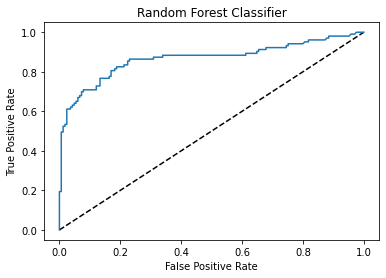

AUC_ROC Score =  0.7998234774933805


In [48]:
fpr,tpr,threshold=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Random Forest Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest Classifier')
plt.show()
auc_score=roc_auc_score(y_test,Final_model.predict(x_test))
print('AUC_ROC Score = ',auc_score)

As we can, We have got 83% accuracy with the help of Random Forest Classifier, The AUC_ROC curve is also showing near by results.

In [49]:
import joblib
joblib.dump(Final_model,'Titanic.obj')

['Titanic.obj']